# Analysis

There is a clear correlation between city latitude and maximum temperature. In the Northern Hemisphere, there is a strong negative linear relationship, with higher latitudes correlating with lower temperatures and a correlation value of roughly -0.85. In the Southern Hemisphere, the opposite appears to be true with a strong positive linear relationship showing higher latitudes with higher temperatures and a correlation value of roughly 0.72. This means that cities closest to the equator have the highest maximum temperatures. 

There is no clear correlation bewteen city latitude and wind speeds. In the Northern Hemisphere, there does not appear to be a relationship between latitude and wind speed, highlighted by a correlation value of roughly 0.01. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and wind speed, highlighted by a correlation value of roughly -0.18. 

There is also no clear correlation between city latitude and humidity. In the Northern Hemisphere, there does not appear to be a relationship between latitude and humidity, highlighted by a correlation value of roughly 0.18. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and humidity, highlighted by a correlation value of roughly 0.09. 

Additionally, there is no clear correlation between city latitude and cloudiness. In the Northern Hemisphere, there does not appear to be a relationship between latitude and cloudiness, highlighted by a correlation value of roughly 0.13. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and cloudiness, highlighted by a correlation value of roughly 0.17. 

Given these low correlation values, a city's latitude does not appear to have a major affect on its wind speeds, humidity, or cloudiness. 





In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "Output/weatherpy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
# Set temperature units
temp_unit = "imperial"

# Define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weatherkey}&units={temp_unit}&q="

# Set summary lists
city2 = []
cloudinesses = []
dates = []
humidities = []
lat = []
lng = []
max_temp = []
wind_speed = []
countries = []

# Set initial count
count_one = 0
set_one = 1

# Loop for creating summary
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city2.append(city)
        else:
            count_one += 1
            city2.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping ...")
print("------------------------------\nData Retrieval Complete\n------------------------------")       

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | grand river south east
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | roald
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | jamestown
City not found. Skipping ...
Processing Record 8 of Set 1 | tocopilla
Processing Record 9 of Set 1 | verkhnyaya inta
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | sakakah
City not found. Skipping ...
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | mys shmidta
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | pedernales
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | pontes e lacerda
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | predivinsk
Processing Record 45 of Set 4 | bose
Processing Record 46 of Set 4 | cortez
Processing Record 47 of Set 4 | cidreira
City not found. Skipping ...
Processing Record 48 of Set 4 | dimapur
Processing Record 49 of Set 4 | zhaotong
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | sangar
City not found. Skipping ...
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | kodinsk
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | maldonado
City not found. Skipping ...
Processing Record 9 of Set 5 | andijon
Processing Record 10 of Set 5 | sai buri
Processing Record 11 of Set 5 | cassilandia
Processing Record 12 of Set 5 | wufeng
Processing Record 13 of Set 5 | caarapo
Processing Record 14 of Set 5 

Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | maragogi
Processing Record 31 of Set 8 | rosario do sul
Processing Record 32 of Set 8 | surgut
Processing Record 33 of Set 8 | blackfoot
Processing Record 34 of Set 8 | vardo
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | beruwala
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | nalut
Processing Record 41 of Set 8 | san quintin
Processing Record 42 of Set 8 | praia da vitoria
Processing Record 43 of Set 8 | rio tercero
Processing Record 44 of Set 8 | manaure
Processing Record 45 of Set 8 | milazzo
Processing Record 46 of Set 8 | bassar
Processing Record 47 of Set 8 | waitati
Processing Record 48 of Set 8 | codrington
Processing Record 49 of Set 8 | yangambi
Processing Record 1 of Set 9 | soyo
Processing Record 2 of Set 9 | coquimbo
Processing Record 3 of Set 9 |

Processing Record 15 of Set 12 | otjimbingwe
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
# Create dictionary for summary dataframe
weather_dict = {"City":city2, "Country":countries, "Latitude":lat, "Longitude":lng, "Date":dates, "Cloudiness":cloudinesses, "Humidity":humidities, "Max Temperature":max_temp, "Wind Speed":wind_speed}

# Create dataframe
weather_df = pd.DataFrame(weather_dict)

# Output to csv
weather_df.to_csv(output)

# Display dataframe
weather_df

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
0,east london,IS,65.0000,-15.0000,1619287264,0,66,48.20,12.66
1,grand river south east,US,38.8755,-109.5012,1619287264,1,14,73.00,5.75
2,ushuaia,AR,-54.8000,-68.3000,1619286972,40,58,55.40,16.11
3,portland,US,45.5234,-122.6762,1619286600,90,81,50.00,9.22
4,roald,NO,62.5833,6.1333,1619287265,20,60,39.20,8.05
...,...,...,...,...,...,...,...,...,...
549,amahai,ID,-3.3333,128.9167,1619287418,97,81,78.15,3.27
550,koygorodok,RU,60.4450,50.9968,1619287418,100,89,43.77,8.95
551,colombo,LK,6.9319,79.8478,1619287231,20,78,78.80,3.44
552,najran,SA,17.4924,44.1277,1619287418,75,16,87.80,6.91


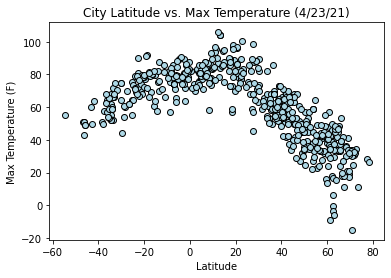

In [5]:
# Create Temperature v. Latitude Scatter
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"],edgecolors="black",facecolors="lightblue")

# Set titles and labels
plt.title("City Latitude vs. Max Temperature (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save image
plt.savefig("Images/latvtempscatter.png")

# Display scatter
plt.show()

The Max Temperature vs. City Latitude plot includes all the cities in the dataset and compares latitude with the max temperature of each city. This compairson shows a possible relationship between latitude and temperature.

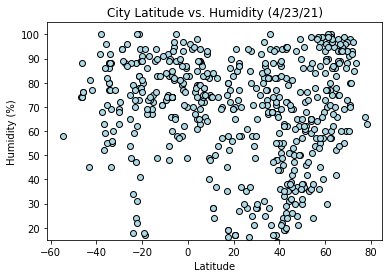

In [6]:
# Create Humidity v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Humidity (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set y limit
plt.ylim(15,105)

# Save image
plt.savefig("Images/latvhumidityscatter.png")

# Display scatter
plt.show()

The City Latitude vs. Humidity includes all the cities in the dataset and compares latitude with the humidity of each city. There does not appear to be a relationship between humidity and latitude, though the data largely clusters above 50% humidity. 

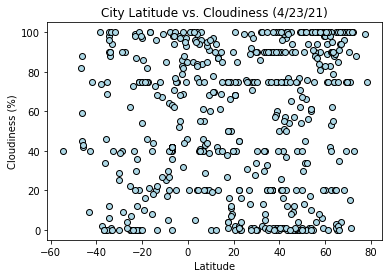

In [7]:
# Create Cloudiness v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="lightblue")

# Set title and labels
plt.title("City Latitude vs. Cloudiness (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image
plt.savefig("Images/latvcloudinessscatter.png")

# Display chart
plt.show()

The City Latitude vs. Cloudiness plot includes all the cities in the dataset and compares latitude with the cloudiness of each city. There appears to be some clustering along the cloudiness levels (0%, 20%, 40%, 80%, 90%, 100%), but this could be due to rounding in the cloudiness percentage data. 

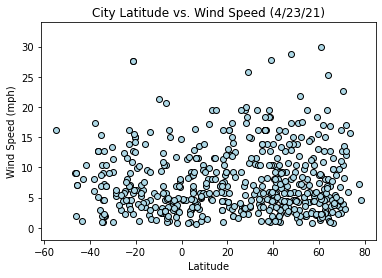

In [8]:
# Create Wind v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Wind Speed (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set y limit
plt.ylim(-2,34)

# Save image
plt.savefig("Images/latvwindscatter.png")

# Display chart
plt.show()

The City Latitude vs. Wind Speed plot includes all the cities in the dataset and compares latitude with wind speeds in each city. There does not seem to be a distinct relationship bewteen latitude and wind speed, but the majority of data points are below 20 mph. 

In [18]:
# Create Northern and Southern Hemisphere dataframes
x = 0
northhem = weather_df.query(f"Latitude >= {x}")
southhem = weather_df.query(f"Latitude < {x}")

The r-value is: -0.8549679639108582


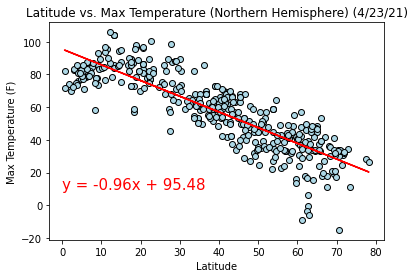

In [19]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvtempnorth.png")

# Display graph
plt.show()

The r-value is: 0.7163726330492585


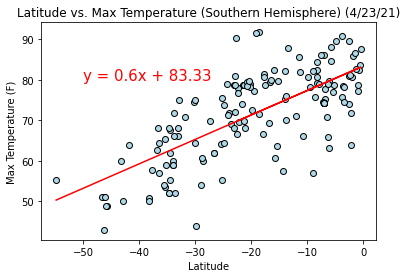

In [20]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temperature (Southern Hemisphere) (4/23/21)")

# Print correlation
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvtempsouth.png")

# Display graph
plt.show()

The Latitude vs. Max Temperature plots for the Southern and Northern Hemispheres model the relationship bewteen city latitude and max temperature in each hemisphere. In the Northern Hemisphere, there is a strong negative linear relationship, with higher latitudes correlating with lower temperatures and a correlation value of roughly -0.85. In the Southern Hemisphere, the opposite appears to be true with a strong positive linear relationship showing higher latitudes with higher temperatures and a correlation value of roughly 0.72. 

The r-value is: 0.1844282894093197


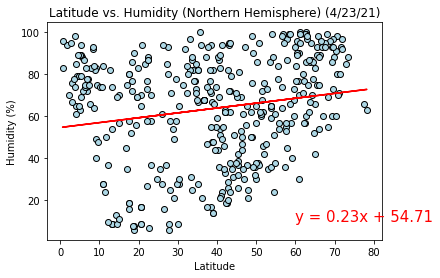

In [21]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvhumiditynorth.png")

# Display graph
plt.show() 

The r-value is: 0.08771894940927369


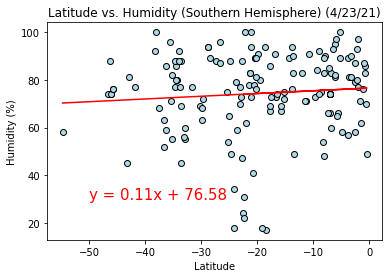

In [22]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity (Southern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvhumiditysouth.png")

# Display graph
plt.show()

The Latitude vs. Humidity plots for the Southern and Northern Hemispheres model the relationship bewteen city latitude and humidity in each hemisphere. In the Northern Hemisphere, there does not appear to be a relationship between latitude and humidity, highlighted by a correlation value of roughly 0.18. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and humidity, highlighted by a correlation value of roughly 0.09. 

The r-value is: 0.1342372863970444


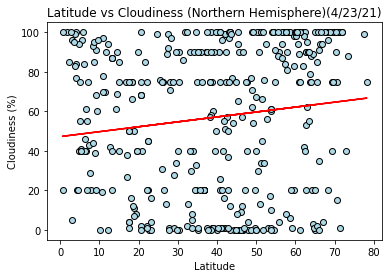

In [23]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvcloudnorth.png")

# Display graph
plt.show()

The r-value is: 0.1723238444821269


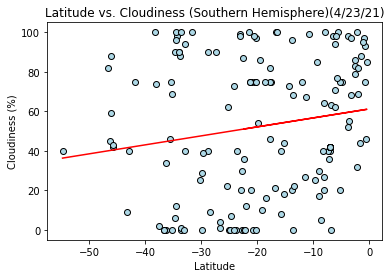

In [24]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Create labels and title
plt.annotate(line_eq,(-50,-10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvcloudsouth.png")

# Display graph
plt.show()

The Latitude vs. Cloudiness plots for the Southern and Northern Hemispheres model the relationship bewteen city latitude and cloudiness in each hemisphere. In the Northern Hemisphere, there does not appear to be a relationship between latitude and cloudiness, highlighted by a correlation value of roughly 0.13. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and cloudiness, highlighted by a correlation value of roughly 0.17.

The r-value is: 0.005556106767907621


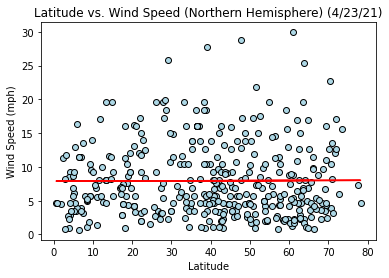

In [25]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-1,-1),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvwindnorth.png")

# Display graph
plt.show()

The r-value is: -0.1768066970509463


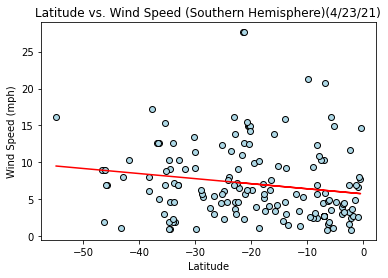

In [26]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,-1),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvwindsouth.png")

# Display graph
plt.show()

The Latitude vs. Wind Speed plots for the Southern and Northern Hemispheres model the relationship bewteen city latitude and wind speed in each hemisphere. In the Northern Hemisphere, there does not appear to be a relationship between latitude and wind speed, highlighted by a correlation value of roughly 0.01. In the Southern Hemisphere, there also does not appear to be a relationship between latitude and wind speed, highlighted by a correlation value of roughly -0.18.